In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import visualise as v
import functions as f
import algorythm as alg
import math
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [16]:
df = pd.read_csv(r'./dataset/sample_trainset (1)-labeled (5).csv', header=0, sep=',')
df['label'] = (df['label'] > 0)*1
df.rename(columns={'label':'markup', 'value': 'temperatureAvg'}, inplace=True)
df.drop('series', inplace=True, axis = 1)
df.drop('timestamp', inplace=True, axis = 1)
df['id'] = np.arange(len(df))

,temperatureAvg,markup,id
0,0.734466,0,0
1,0.610840,0,1
2,0.092170,0,2
3,-1.030709,0,3
4,-1.344064,0,4
...,...,...,...
1451,-0.370085,0,1451
1452,-0.695655,0,1452
1453,0.020647,0,1453
1454,1.332105,1,1454


In [19]:
input_size = 16
inputs = keras.Input(shape=(input_size,))
dense_1 = layers.Dense(128, activation = "ReLU")(inputs)
dense_2 = layers.Dense(4, activation = "ReLU")(dense_1)
outputs = layers.Dense(1, activation = "sigmoid")(dense_2)
model = keras.Model(inputs=inputs, outputs=outputs, name="thermal-model")
model.summary()

Model: "thermal-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,697
Trainable params: 2,697
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.load_weights('.\models\weight.h5')

In [22]:
data = pd.read_csv(r'./dataset/mount2.csv', header=0, sep =',')


In [23]:
input_size = 16
x_ = np.empty((0, input_size))
y_ = np.empty((0, 1))
a, b = f.create_data(data, input_size)
x_ = np.append(x_, a, axis=0)
y_ = np.append(y_, b)
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_), y=y_)
class_weights = dict(zip(np.unique(y_), class_weights))
class_weights
x_train, y_train = x_[:1100], y_[:1100]
x_val, y_val = x_[1100:], y_[1100:]

Text(0, 0.5, 'temperatureAvg -\n температура кадра')

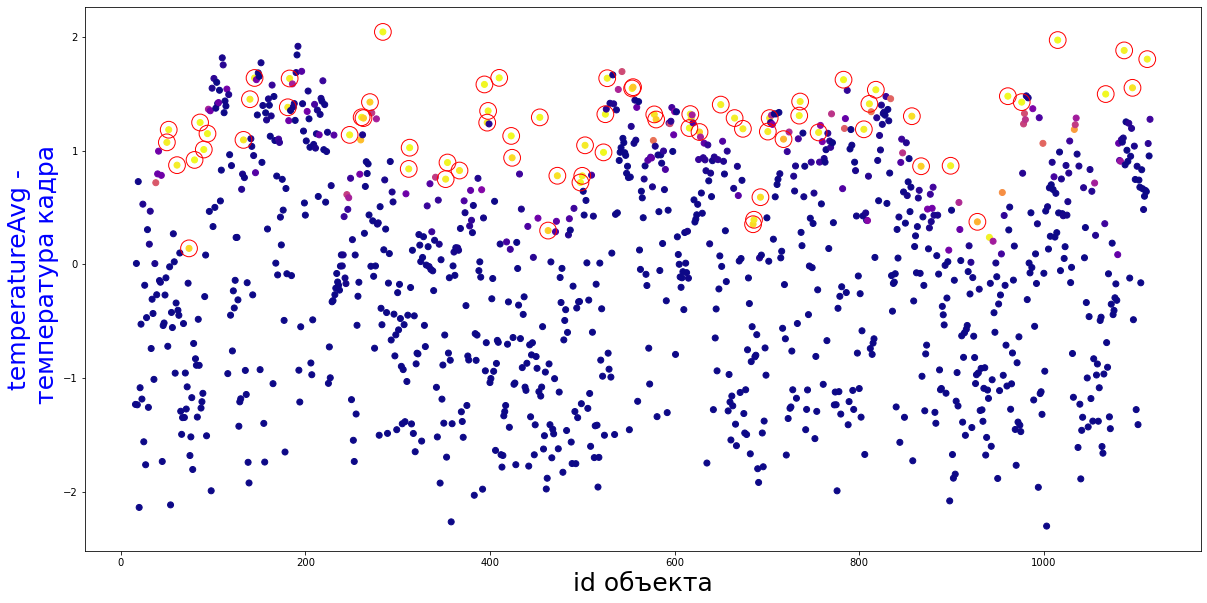

In [24]:
prediction = model.predict(x_train)
fig = plt.figure(figsize=(20, 10))
plot = fig.add_subplot(111)
plot.scatter(data=data[input_size:1100 + input_size], x='id', y='temperatureAvg', c=prediction, alpha=1, cmap='plasma')
plot.scatter(data=data[input_size:1100 + input_size].loc[data[input_size:1100 + input_size]['markup'] == 1], x='id',
             y='temperatureAvg', alpha=1, s=280, edgecolors='r', facecolors='none')
plot.set_xlabel('id объекта', fontsize=25, color='black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize=25, color='blue')

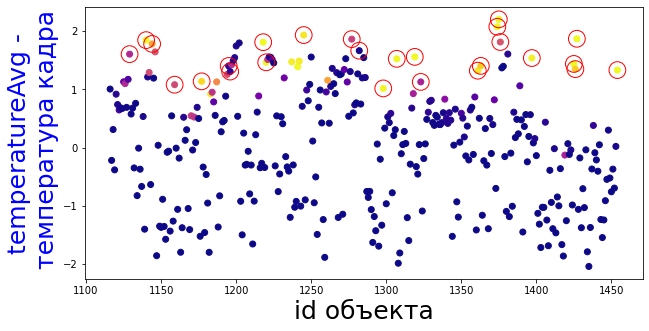

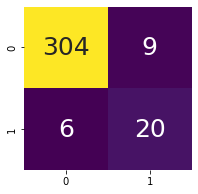

The precision score is: 0.69
The recall score is: 0.77 

Accuracy score is: 0.96
The F1 score is: 0.73


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
prediction = model.predict(x_val)
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data=data[1100 + input_size:-1], x='id', y='temperatureAvg', c=prediction, alpha=1, cmap='plasma')
plot.scatter(data=data[1100 + input_size:-1].loc[data[1100 + input_size:-1]['markup'] == 1], x='id', y='temperatureAvg',
             alpha=1, s=280, edgecolors='r', facecolors='none')
plot.set_xlabel('id объекта', fontsize=25, color='black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize=25, color='blue')
matrix_preidction = prediction > 0.5
matrix = confusion_matrix(y_val, matrix_preidction)
plt.figure(figsize=(3, 3))
sns.heatmap(matrix, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()
print("The precision score is: %.2f" % precision_score(y_val, matrix_preidction))
print("The recall score is: %.2f" % recall_score(y_val, matrix_preidction), "\n")
print("Accuracy score is: %.2f" % accuracy_score(y_val, matrix_preidction))
print("The F1 score is: %.2f" % f1_score(y_val, matrix_preidction))